In [1]:
import numpy as np
import pandas as pd
import seaborn, time

from pomegranate import BayesianNetwork

In [2]:
seaborn.set_style('whitegrid')

In [3]:
"""
X = np.random.randint(2, size=(2000, 7))
X[:,3] = X[:,1]
X[:,6] = X[:,1]

X[:,0] = X[:,2]

X[:,4] = X[:,5]

model = BayesianNetwork.from_samples(X, algorithm='exact')
print(model.structure)
model.plot()
"""

"\nX = np.random.randint(2, size=(2000, 7))\nX[:,3] = X[:,1]\nX[:,6] = X[:,1]\n\nX[:,0] = X[:,2]\n\nX[:,4] = X[:,5]\n\nmodel = BayesianNetwork.from_samples(X, algorithm='exact')\nprint(model.structure)\nmodel.plot()\n"

In [4]:
def sanitize_celeb_attr_data(unsanitize_attrs_file):
    
    attr_list = []
    
    unsanitize_attrs = open(unsanitize_attrs_file,'r').readlines()
    
    for a in unsanitize_attrs:
        attr_line = a.strip('\n').split(' ')
        attrs_sanitized = [attr for attr in attr_line if attr != '']
        attr_list.append(attrs_sanitized)
        
    with open('/home/c01muya/vae-disentanglement/datasets/celeba/list_attr_celeba_sanitized.txt','w') as list_attr_celeb_sen:
        for attr_line in attr_list:
            list_attr_celeb_sen.write(
                ",".join(attr_line) + "\n"
            )

In [5]:
#sanitize_celeb_attr_data("/home/c01muya/vae-disentanglement/datasets/celeba/list_attr_celeba.txt")

In [6]:
celeb_attrs = pd.read_csv("/home/c01muya/vae-disentanglement/datasets/celeba/list_attr_celeba_sanitized.txt", 
                          sep=",", encoding='ascii')
celeb_attrs.drop('Image_ID', axis='columns', inplace=True)
celeb_attrs.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [10]:
celeb_attrs_mat = celeb_attrs.to_numpy()
print(celeb_attrs_mat.shape)

(202599, 40)
(1000, 40)


In [15]:
celeb_attrs_mat_subset = celeb_attrs_mat[:10000,:]
print(celeb_attrs_mat_subset.shape)

(10000, 40)


((), (36,), (36,), (7,), (20,), (20,), (1,), (20,), (9,), (20,), (2,), (8,), (20,), (7,), (13,), (2,), (24,), (39,), (36,), (36,), (0,), (31,), (24,), (21,), (20,), (19,), (19,), (18,), (2,), (18,), (24,), (19,), (33,), (36,), (20,), (36,), (20,), (20,), (20,), (2,))


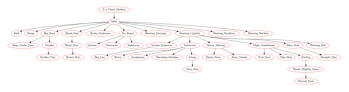

In [16]:
model = BayesianNetwork.from_samples(celeb_attrs_mat_subset, 
                                     state_names=celeb_attrs.columns.to_list(), 
                                     algorithm='chow-liu')
print(model.structure)
model.plot()

In [17]:
#%matplotlib inline

model.plot("reports/learned-dag-2.pdf")